Data Preparation

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import re
from collections import Counter


In [68]:
movie_dataset = pd.read_csv(r"tmdb_5000_movies.csv")


In [69]:
movie_dataset.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [70]:
movie_dataset = movie_dataset[['genres', 'keywords', 'overview']].copy()
movie_dataset.head()


,genres,keywords,overview
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","In the 22nd century, a paraplegic Marine is di..."
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","Captain Barbossa, long believed to be dead, ha..."
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",A cryptic message from Bond’s past sends him o...
3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",Following the death of District Attorney Harve...
4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","John Carter is a war-weary, former military ca..."


In [71]:
movie_dataset.isnull().sum()

genres      0
keywords    0
overview    3
dtype: int64

In [72]:
movie_dataset = movie_dataset.dropna(subset=['overview'])
movie_dataset.isnull().sum()

genres      0
keywords    0
overview    0
dtype: int64

In [73]:
print(movie_dataset.duplicated().sum())


0


In [74]:
len(movie_dataset)

4800

Genres - data visulisation

In [75]:
movie_dataset_genres = movie_dataset[['overview', 'genres']].copy()


In [76]:
def to_name_list(cell):
    if pd.isna(cell) or cell == "":
        return []
    try:
        genres = json.loads(cell)
    except Exception:
            return []
    return [d.get("name") for d in genres if isinstance(d, dict) and "name" in d]

movie_dataset_genres["genres_list"] = movie_dataset_genres["genres"].apply(to_name_list)

genres_long = movie_dataset_genres.explode("genres_list", ignore_index=True)
genres_long = genres_long.dropna(subset=["genres_list"])

movie_dataset_genres.head()


,overview,genres,genres_list
0,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[Action, Adventure, Fantasy, Science Fiction]"
1,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[Adventure, Fantasy, Action]"
2,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[Action, Adventure, Crime]"
3,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[Action, Crime, Drama, Thriller]"
4,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[Action, Adventure, Science Fiction]"


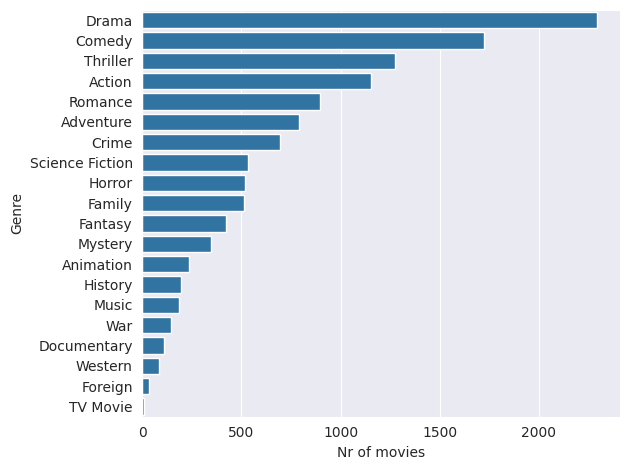

In [77]:
top_genres = genres_long["genres_list"].value_counts().index
plot_data = genres_long[genres_long["genres_list"].isin(top_genres)]


sns.countplot(y="genres_list", data=plot_data, order=plot_data["genres_list"].value_counts().index)
plt.xlabel("Nr of movies")
plt.ylabel("Genre")
plt.tight_layout()
plt.savefig("genres_distribution.jpg", dpi=300, bbox_inches='tight')
plt.show()

In [78]:
genre_counts = genres_long["genres_list"].value_counts()

genre_counts

genres_list
Drama              2296
Comedy             1722
Thriller           1274
Action             1154
Romance             894
Adventure           790
Crime               696
Science Fiction     535
Horror              519
Family              513
Fantasy             424
Mystery             348
Animation           234
History             197
Music               185
War                 144
Documentary         108
Western              82
Foreign              34
TV Movie              8
Name: count, dtype: int64

Key words - data visulisation


In [79]:
movie_dataset_keywords = movie_dataset[['overview', 'keywords']].copy()


In [80]:
movie_dataset_keywords["keywords_list"] = movie_dataset_keywords["keywords"].apply(to_name_list)

keywords_long = movie_dataset_keywords.explode("keywords_list", ignore_index=True)
keywords_long = keywords_long.dropna(subset=["keywords_list"])

movie_dataset_keywords.head()

,overview,keywords,keywords_list
0,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[culture clash, future, space war, space colon..."
1,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[ocean, drug abuse, exotic island, east india ..."
2,A cryptic message from Bond’s past sends him o...,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[spy, based on novel, secret agent, sequel, mi..."
3,Following the death of District Attorney Harve...,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[dc comics, crime fighter, terrorist, secret i..."
4,"John Carter is a war-weary, former military ca...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[based on novel, mars, medallion, space travel..."


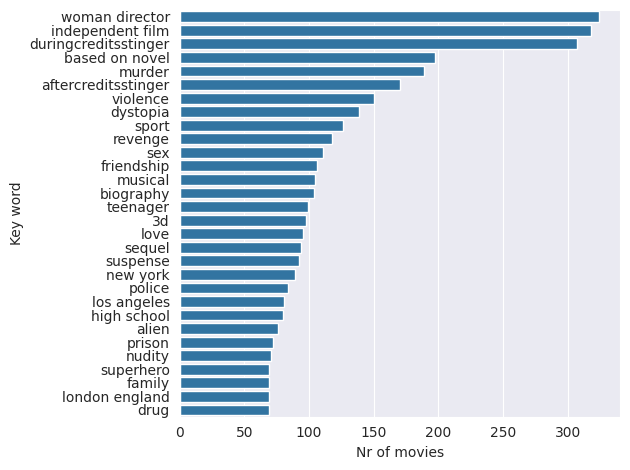

In [81]:
top_n = 30
top_keywords = keywords_long["keywords_list"].value_counts().head(top_n).index
plot_data = keywords_long[keywords_long["keywords_list"].isin(top_keywords)]


sns.countplot(y="keywords_list", data=plot_data, order=plot_data["keywords_list"].value_counts().index)
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False
plt.xlabel("Nr of movies")
plt.ylabel("Key word")
plt.tight_layout()
plt.savefig("keywords_distribution.jpg", dpi=300, bbox_inches='tight')
plt.show()

In [82]:
keywords_counts = keywords_long["keywords_list"].value_counts()

keywords_counts

keywords_list
woman director          324
independent film        318
duringcreditsstinger    307
based on novel          197
murder                  189
                       ... 
guitar case               1
paper knife               1
arms                      1
homeless                  1
gunplay                   1
Name: count, Length: 9808, dtype: int64

Data Preprocessing

In [83]:
def to_id_list(cell):
    if pd.isna(cell) or cell == "":
        return []
    try:
        genres = json.loads(cell)
    except Exception:
            return []
    return [d.get("id") for d in genres if isinstance(d, dict) and "id" in d]

In [84]:
# Changing genres and keywords for list of id's

movie_dataset["genres_list"] = movie_dataset["genres"].apply(to_id_list)
movie_dataset["keywords_list"] = movie_dataset["keywords"].apply(to_id_list)

movie_dataset = movie_dataset[['genres_list', 'keywords_list', 'overview']].copy()
movie_dataset

,genres_list,keywords_list,overview
0,"[28, 12, 14, 878]","[1463, 2964, 3386, 3388, 3679, 3801, 9685, 984...","In the 22nd century, a paraplegic Marine is di..."
1,"[12, 14, 28]","[270, 726, 911, 1319, 2038, 2052, 2580, 2660, ...","Captain Barbossa, long believed to be dead, ha..."
2,"[28, 12, 80]","[470, 818, 4289, 9663, 14555, 156095, 158431]",A cryptic message from Bond’s past sends him o...
3,"[28, 80, 18, 53]","[849, 853, 949, 1308, 1437, 3051, 3562, 6969, ...",Following the death of District Attorney Harve...
4,"[28, 12, 878]","[818, 839, 1456, 3801, 7376, 9951, 10028, 1053...","John Carter is a war-weary, former military ca..."
...,...,...,...
4798,"[28, 80, 53]","[5616, 33649, 162740, 187891, 206558]",El Mariachi just wants to play his guitar and ...
4799,"[35, 10749]",[],A newlywed couple's honeymoon is upended by th...
4800,"[35, 18, 10749, 10770]","[248, 699, 2398, 5340, 34051, 173066]","""Signed, Sealed, Delivered"" introduces a dedic..."
4801,[],[],When ambitious New York attorney Sam is sent t...


In [85]:
# Deleting unique keywords

all_keywords = [kw for kw_list in movie_dataset["keywords_list"] for kw in kw_list]
kw_counts = Counter(all_keywords)

frequent_keywords = {kw for kw, count in kw_counts.items() if count > 20}

movie_dataset["keywords_list"] = movie_dataset["keywords_list"].apply(
    lambda lst: [kw for kw in lst if kw in frequent_keywords]
)

movie_dataset



,genres_list,keywords_list,overview
0,"[28, 12, 14, 878]","[2964, 3801, 9840, 9882, 9951, 13065, 14643, 2...","In the 22nd century, a paraplegic Marine is di..."
1,"[12, 14, 28]","[2038, 3799, 179430]","Captain Barbossa, long believed to be dead, ha..."
2,"[28, 12, 80]","[470, 818, 4289, 9663]",A cryptic message from Bond’s past sends him o...
3,"[28, 80, 18, 53]","[849, 949, 1308, 9715, 156395]",Following the death of District Attorney Harve...
4,"[28, 12, 878]","[818, 3801, 7376, 9951, 10685, 207928, 209714]","John Carter is a war-weary, former military ca..."
...,...,...,...
4798,"[28, 80, 53]",[],El Mariachi just wants to play his guitar and ...
4799,"[35, 10749]",[],A newlywed couple's honeymoon is upended by th...
4800,"[35, 18, 10749, 10770]",[5340],"""Signed, Sealed, Delivered"" introduces a dedic..."
4801,[],[],When ambitious New York attorney Sam is sent t...


In [86]:
# cleaning overview text

def clean_text(text):
    text = text.lower() 
    text = re.sub(r'https?://\S+|www\.\S+', '', text) 
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text) 
    text = re.sub(r'\s+', ' ', text).strip()
    return text

movie_dataset['overview'] = movie_dataset['overview'].apply(clean_text)

movie_dataset

,genres_list,keywords_list,overview
0,"[28, 12, 14, 878]","[2964, 3801, 9840, 9882, 9951, 13065, 14643, 2...",in the 22nd century a paraplegic marine is dis...
1,"[12, 14, 28]","[2038, 3799, 179430]",captain barbossa long believed to be dead has ...
2,"[28, 12, 80]","[470, 818, 4289, 9663]",a cryptic message from bonds past sends him on...
3,"[28, 80, 18, 53]","[849, 949, 1308, 9715, 156395]",following the death of district attorney harve...
4,"[28, 12, 878]","[818, 3801, 7376, 9951, 10685, 207928, 209714]",john carter is a warweary former military capt...
...,...,...,...
4798,"[28, 80, 53]",[],el mariachi just wants to play his guitar and ...
4799,"[35, 10749]",[],a newlywed couples honeymoon is upended by the...
4800,"[35, 18, 10749, 10770]",[5340],signed sealed delivered introduces a dedicated...
4801,[],[],when ambitious new york attorney sam is sent t...


In [87]:
movie_dataset.to_csv("movie_dataset_prepared.csv", index=False)